In [314]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
pd.get_option('display.max_rows')
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display_markdown
from scipy.stats import norm
import scipy.stats as stats
from IPython.display import Markdown,HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import math

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

!pip3 install catboost
from catboost import CatBoostRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
base_path = 'kaggle/input/'
import os
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [315]:
# Colours for plots
primary_colour = "#99C3FB"
highlight_colour = "orange"
shouting_colour = "red"
shouting_clr_r = "r"
green_colour = "green"

<a id = "table-of-content"></a>
# Table of Content

- [Business Understanding](#business_undestanding)
- [Data Understanding](#data_undestanding)
- [Data Preparation](#data_preparation)
- [Modelling and Evaluation](#modelling_n_evaluation)
- [Conclusion](#conclusion)
- [Deploying Model](#deploying_model)
- [References](#references)

[link text](https:// [link text](https://))<a id = "business_undestanding"></a>
# Business Understanding
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.



<a id = "data_understanding"></a>
# Data Understanding
Here we will look at the data and hopefully find interesting patterns in it.

There are a few assumptions that we will make and explore the data to see if these assumptions are true.\
Usually when shopping for a house people might consider the following items:
* Construction date
* House area
* Neighbourhood
* Number and size of rooms
* Parking area

We will try and see if the above items have a strong correlation to the **SalePrice**

In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
df_train = pd.read_csv('/content/drive/My Drive/ColabNotebooks/house_sale_prediction/data/train.csv').sample(frac = 1)
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1295,1296,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2006,WD,Normal,138500
616,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,4,2007,COD,Normal,157900


The train data contains **1460** observations and **81** features and has data types of *int64*, *Objects* and *float64*; there are **43** categorial features and **38** numerical features.

In [318]:
df_train.shape

(1460, 81)

In [319]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [320]:
df_train.select_dtypes(include=['object']).shape

(1460, 43)

In [321]:
df_train.select_dtypes(include=['float64', 'int64']).shape

(1460, 38)

There are a total of **7829** nulls, on one hand the categorical columns have **7481/7829** which is **95.56**%. On the other hand numerical features have **348/7829** nulls which contributes **4.46**% to the total number of nulls.

In [322]:
7481+348

7829

In [323]:
df_train.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [324]:
total_nulls_train = df_train.isna().sum().sort_values(ascending=False).sum()
total_nulls_train

6965

In [325]:
df_train.select_dtypes(include=['object']).isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [326]:
total_categorical_nulls_train = df_train.select_dtypes(include=['object']).isna().sum().sort_values(ascending=False).sum()
total_categorical_nulls_train

6617

In [327]:
(total_categorical_nulls_train/total_nulls_train) * 100

95.00358937544867

In [328]:
total_numerical_nulls_train = df_train.select_dtypes(include=['int64', 'float64']).isna().sum().sort_values(ascending=False).sum()
total_numerical_nulls_train

348

In [329]:
(total_numerical_nulls_train/total_nulls_train) * 100

4.996410624551328

In [330]:
threshold = 20

*italicised text*## Numerical columns

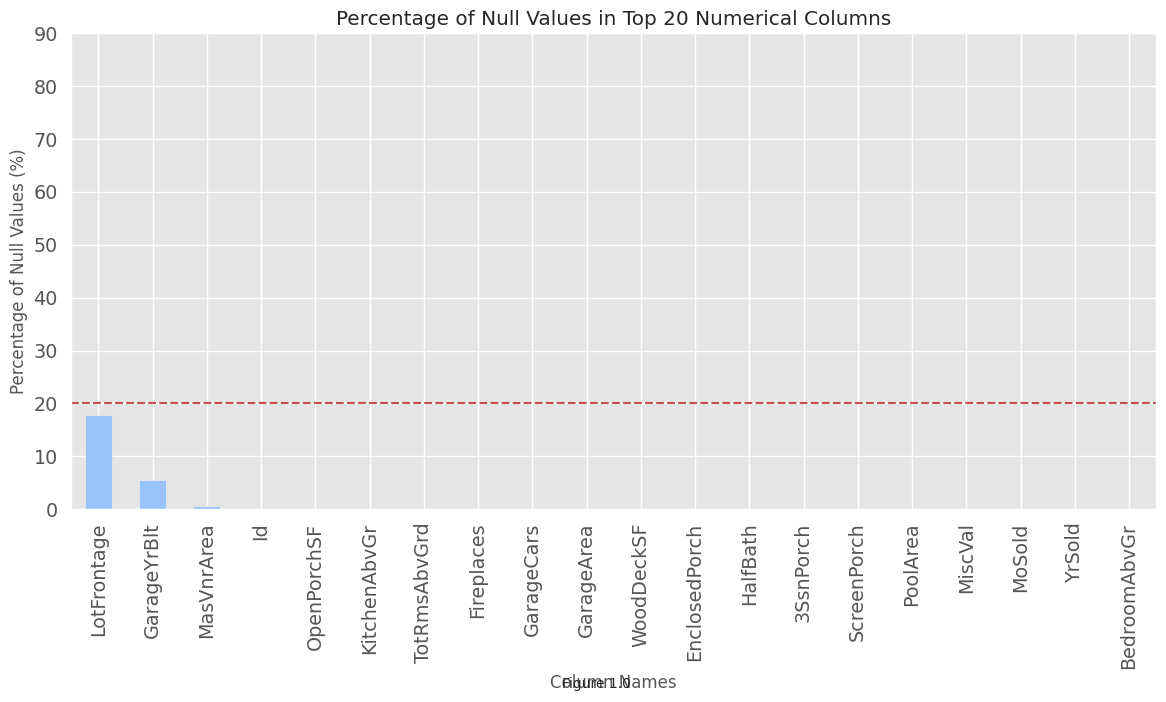

In [331]:
import pandas as pd
import matplotlib.pyplot as plt

df_num = df_train.select_dtypes(include=['float64', 'int64']).copy()
num_col_names = df_num.columns

# Calculate the percentage of null values for each column
total_rows = len(df_num)
null_counts = df_num.isnull().sum()

# Sort the columns in descending order of null value counts
sorted_null_counts = null_counts.sort_values(ascending=False)

# Select top 20 columns
top_20_null_counts = sorted_null_counts.head(20)

# Calculate percentage for these top 20 columns
top_20_null_percentage = (top_20_null_counts / total_rows) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
top_20_null_percentage.plot(kind='bar', color=primary_colour)
ax.set_title('Percentage of Null Values in Top 20 Numerical Columns')
ax.set_ylabel('Percentage of Null Values (%)')
ax.set_xlabel('Column Names')
ax.set_yticks(np.arange(0, 100, 10))
ax.axhline(y=threshold, color=shouting_clr_r, linestyle='--')  # Here 'r' specifies the color red and '--' specifies a dashed line.
#Add caption
fig.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make space for the caption
fig.text(0.5, -0.05, "Figure 1.0", ha='center', va='center', fontsize=10, wrap=True)
plt.show()

## Categorical columns

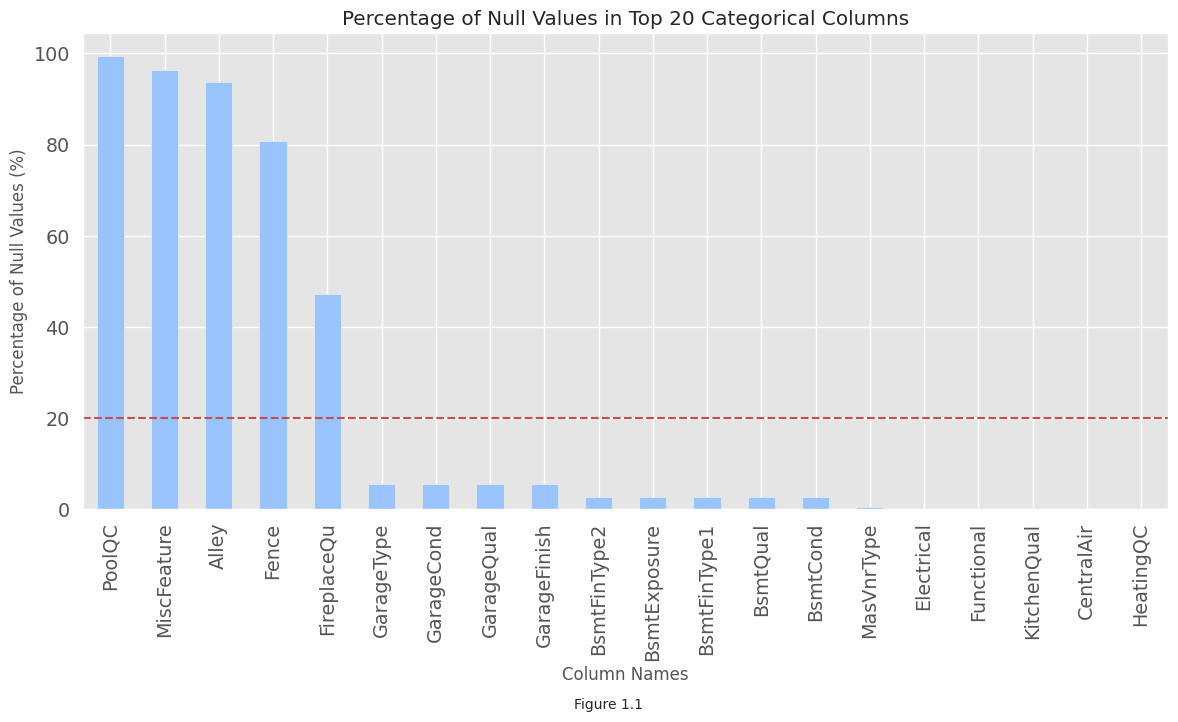

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

df_cat = df_train.select_dtypes(include=['object', 'O']).copy()
cat_col_names = df_cat.columns

# Calculate the percentage of null values for each column
total_rows = len(df_cat)
null_counts = df_cat.isnull().sum()

# Sort the columns in descending order of null value counts
sorted_null_counts = null_counts.sort_values(ascending=False)

# Select top 20 columns
top_20_null_counts = sorted_null_counts.head(20)

# Calculate percentage for these top 20 columns
top_20_null_percentage = (top_20_null_counts / total_rows) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
top_20_null_percentage.plot(kind='bar', color=primary_colour)
ax.set_title('Percentage of Null Values in Top 20 Categorical Columns')
ax.set_ylabel('Percentage of Null Values (%)')
ax.set_xlabel('Column Names')
ax.axhline(y=threshold, color=shouting_clr_r, linestyle='--')  # Here 'r' specifies the color red and '--' specifies a dashed line.
#Add caption
fig.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make space for the caption
fig.text(0.5, -0.08, "Figure 1.1", ha='center', va='center', fontsize=10, wrap=True)
plt.show()

<a id = "data_preparation"></a>
# Data Preparation

We are going to drop the categorical columns *PoolQC*, *MiscFeature*, *Alley*, *Fence*, *MasVnrType* and *FireplaceQu* contributes **89**% to the **7481** null values as shown in Figure 1.1. We do not need to drop any numberical columns because the percentage of nulls for numerical the numerical columns is below the **20**% threshold marked with the red dotted line.

In [333]:
top_20_percent_null_cat_col_train = df_train[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']].isna().sum().sum()
top_20_percent_null_cat_col_train

6105

In [334]:
top_20_percent_null_cat_col_train/total_nulls_train * 100

87.65254845656855

In [335]:
num_col_names

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [336]:
df_step_1_train = df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'])
df_step_1_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1295,1296,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,WD,Normal,138500
616,617,60,RL,NaN,7861,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,183200
278,279,20,RL,107.0,14450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,142,0,0,5,2007,New,Partial,415298
178,179,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,7,2009,New,Partial,501837
813,814,20,RL,75.0,9750,Pave,Reg,Lvl,AllPub,Inside,...,275,0,0,0,500,4,2007,COD,Normal,157900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1375,60,FV,85.0,10625,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2008,WD,Normal,250000
1087,1088,60,FV,85.0,10574,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,252000
694,695,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2009,WD,Normal,141500
1317,1318,120,FV,47.0,4230,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2007,New,Partial,208900


In [337]:
df_indexes_train = df_step_1_train.pop('Id')
df_corr_train = df_step_1_train.copy()
df_indexes_train

1295    1296
616      617
278      279
178      179
813      814
        ... 
1374    1375
1087    1088
694      695
1317    1318
1365    1366
Name: Id, Length: 1460, dtype: int64

In [338]:
df_target_train = df_step_1_train.pop('SalePrice')
df_target_train.head()

1295    138500
616     183200
278     415298
178     501837
813     157900
Name: SalePrice, dtype: int64

## Correlation of numerical values

In [339]:
df_corr_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1295,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,138500
616,60,RL,NaN,7861,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,183200
278,20,RL,107.0,14450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,142,0,0,5,2007,New,Partial,415298
178,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2009,New,Partial,501837
813,20,RL,75.0,9750,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,275,0,0,0,500,4,2007,COD,Normal,157900


In [340]:
df_corr_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1295,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,138500
616,60,RL,NaN,7861,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,183200
278,20,RL,107.0,14450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,142,0,0,5,2007,New,Partial,415298
178,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2009,New,Partial,501837
813,20,RL,75.0,9750,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,275,0,0,0,500,4,2007,COD,Normal,157900


In [341]:
corr_matrix_num_train = df_corr_train.select_dtypes(include=['int64', 'float64']).corr()
corr_matrix_num_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


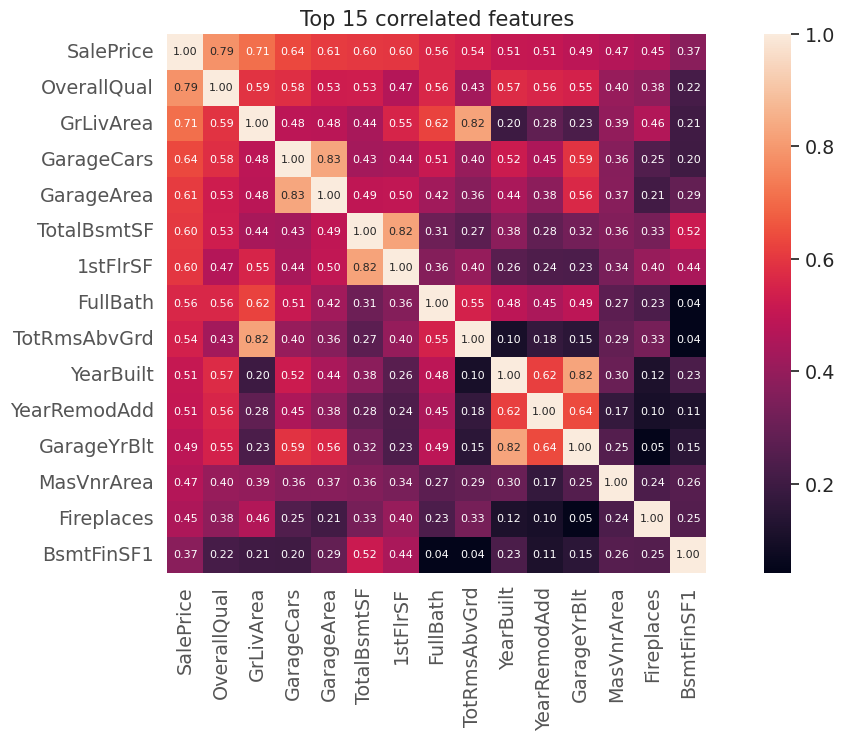

In [342]:
from scipy.stats import spearmanr


fig2, ax2 = plt.subplots(figsize=(15, 7))
cols = corr_matrix_num_train.nlargest(15, 'SalePrice')['SalePrice'].index
# Use only numerical columns to create correlation matrix and transpose the values
# Why do we have to transpose the values?
# There are some nulls so I droppped them
cm = np.corrcoef(df_corr_train.select_dtypes(include=['int64', 'float64'])[cols].dropna().values.T)

# correlation_matrix, p_value_matrix = spearmanr(df_hm_train.select_dtypes(include=['int64', 'float64'])[cols].dropna().values.T)


sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, ax=ax2)
plt.title("Top 15 correlated features")
plt.show()

From the correlation matrix above we can see that the OverallQual feature has the highest positive correlation of **0.8** which makes sense a home buyer would look at the quality of the house before purchase.
The GrLivArea has a correlation of **0.71**; a buyer would look at how much space the house has.
The GarageCars has a correlation of **0.65**, I mean who would not want parking.
The GarageArea has a correlation of **0.62** which is similar to GarageCars.
The r values for GarageCars and GarageArea **0.83** shows there is multicolinearity which is not desirable in some machine learning algorithms so we are going to drop GarageArea.

GrLivArea**0.71** - TotRmsAbvGrd**0.62** **0.82**
GrLivArea**0.71** - 2ndFlrSF**0.31** **0.69**
TotalBsmtSF**0.62** - 1stFlrSF**0.61** **0.84**
TotRmAbvGrd**0.62** - 2ndFlrSF**0.61** **0.62**


OverallQual: Rates the overall material and finish of the house
GrLivArea: Above grade (ground) living area square feet
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet

TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet

In [343]:
# Multicolinearity
df_clean_train = df_step_1_train.drop(columns=['GarageArea', '1stFlrSF', 'GarageYrBlt', 'TotRmsAbvGrd'])

In [344]:
def summary(data):
    # Check if input is a DataFrame or Series
    if isinstance(data, pd.Series):
        data = data.to_frame()
    elif not isinstance(data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame or Series")

    # Describe the data to get basic stats
    desc = data.describe(percentiles=[.25, .5, .75]).transpose()

    # Rename columns
    columns_rename = {
        'min': 'Min.',
        '25%': '1st Qu.',
        '50%': 'Median',
        'mean': 'Mean',
        '75%': '3rd Qu.',
        'max': 'Max.'
    }
    desc.rename(columns=columns_rename, inplace=True)

    # Count missing values
    desc["NA's"] = data.shape[0] - desc['count']
    desc.drop(columns=['count'], inplace=True)
    desc = desc.applymap(lambda x: "{:,.2f}".format(x))

    # Reorder columns
    column_order = ['Min.', '1st Qu.', 'Median', 'Mean', '3rd Qu.', 'Max.', "NA's"]
    desc = desc[column_order]

    return display(Markdown(desc.to_markdown()))

In [345]:
summary(df_corr_train['SalePrice'])

|           | Min.      | 1st Qu.    | Median     | Mean       | 3rd Qu.    | Max.       |   NA's |
|:----------|:----------|:-----------|:-----------|:-----------|:-----------|:-----------|-------:|
| SalePrice | 34,900.00 | 129,975.00 | 163,000.00 | 180,921.20 | 214,000.00 | 755,000.00 |      0 |

In [346]:
# Define a function to format numbers with commas
def with_commas(x, pos):
    return f"{x:,.2f}"

In [347]:
scaler = MaxAbsScaler()
# df_target_train_norm = scaler.fit_transform(np.array(df_target_train).reshape(-1, 1))
df_target_train_norm = np.log(df_target_train)
df_target_train_norm

1295    11.838626
616     12.118334
278     12.936752
178     13.126031
813     11.969717
          ...    
1374    12.429216
1087    12.437184
694     11.860055
1317    12.249611
1365    12.283034
Name: SalePrice, Length: 1460, dtype: float64

### Sale Price
The sale price is a *continuous* data type; the *minimum* sale price is **34,900.00** and the *maximum* is **755,000.00**;
the average sale price is **163,000.00**. The distribution is right skewed and looking at the probability plots(QQ plots)
it follows a gamma distribution; the *mean* sale price is **180,921.20** is larger than the *median* showing there are some houses
that are highly priced i.e. *outliers*. The sale price has a standard deviation of **79,4420.50** which is *significant*, this could
be because of the outliers.Later we will explore the data to see why that is the case; we will also see
what effect the removal of the *outliers* has on the *distribution* of the data and the *measures of of central tendency*.

In [348]:
# Five num summary
summary(df_corr_train['SalePrice'])

|           | Min.      | 1st Qu.    | Median     | Mean       | 3rd Qu.    | Max.       |   NA's |
|:----------|:----------|:-----------|:-----------|:-----------|:-----------|:-----------|-------:|
| SalePrice | 34,900.00 | 129,975.00 | 163,000.00 | 180,921.20 | 214,000.00 | 755,000.00 |      0 |

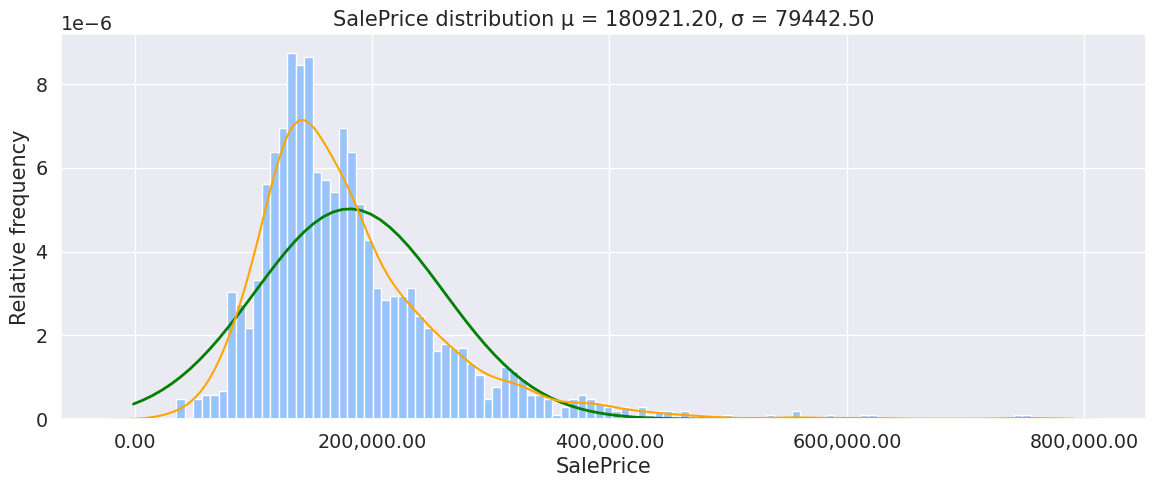

In [349]:
fig_sale_price_dist, ax_sale_price_dist = plt.subplots(figsize=(14,5))
plt.hist(df_corr_train['SalePrice'], bins=100, density=True, color=primary_colour)
ax_sale_price_dist.xaxis.set_major_formatter(ticker.FuncFormatter(with_commas))
# Calculate average and standard deviation
mu, std = df_corr_train['SalePrice'].mean(), df_corr_train['SalePrice'].std()
plt.title(f"SalePrice distribution μ = {mu:.2f}, σ = {std:.2f}")
plt.ylabel("Relative frequency")
# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)
sns.kdeplot(df_corr_train['SalePrice'], color=highlight_colour)
plt.show()

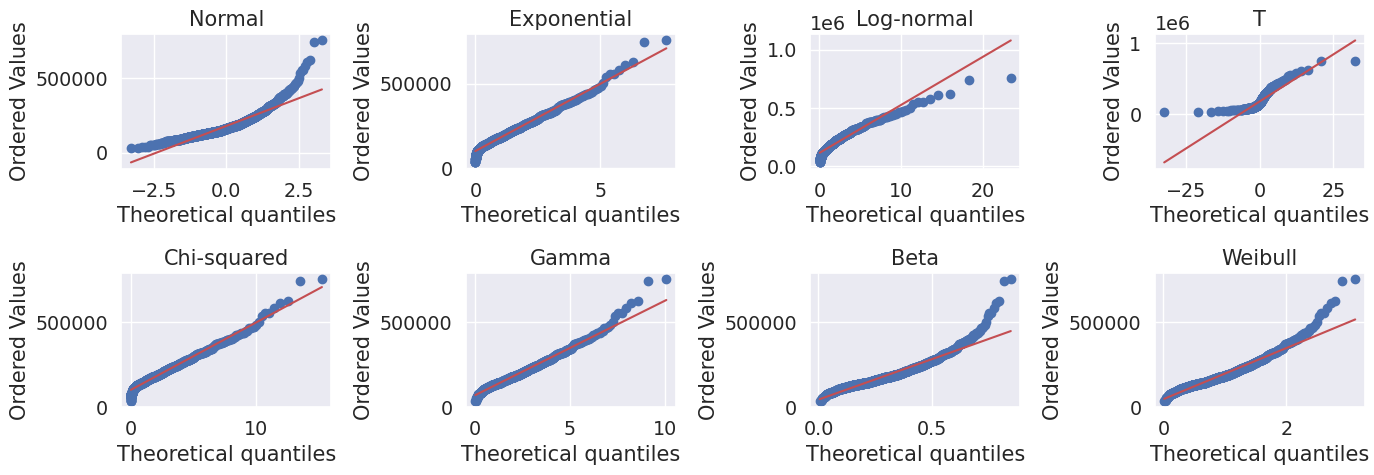

In [350]:
fig_sale_price_qq, ax_sale_price_qq = plt.subplots(nrows=2,ncols=4, figsize=(14,5))
distributions = ["norm", "expon", "lognorm", "t", "chi2", "gamma", "beta", "weibull_min"]
titles = ["Normal", "Exponential", "Log-normal", "T", "Chi-squared", "Gamma", "Beta", "Weibull"]
sparams = [(), (), (0.954,), (2,), (2,), (2,), (2, 5), (1.79,)]

for dist, sparam, ax, title in zip(distributions, sparams, ax_sale_price_qq.flatten(), titles):
    stats.probplot(df_corr_train['SalePrice'], dist=dist, sparams=sparam, plot=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Sale Price violin
fig_sale_price_violin = go.Figure(data=go.Violin(y=df_corr_train['SalePrice'], box_visible=True,
                        meanline_visible=True, fillcolor=primary_colour, x0='Sale Price'))
fig_sale_price_violin.update_layout(template='ggplot2',height=700)
fig_sale_price_violin.show()

In [351]:
# @title


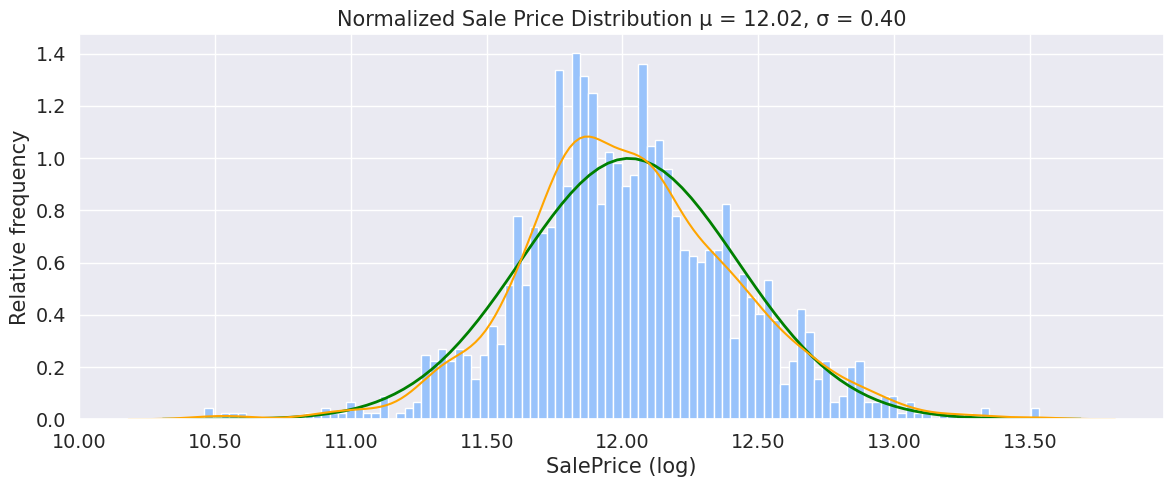

In [352]:
fig4, ax4 = plt.subplots(figsize=(14,5))
plt.hist(df_target_train_norm, bins=100, density=True, color=primary_colour)
ax4.xaxis.set_major_formatter(ticker.FuncFormatter(with_commas))

# Calculate average and standard deviation
mu, std = df_target_train_norm.mean(), df_target_train_norm.std()

plt.title(f"Normalized Sale Price Distribution μ = {mu:.2f}, σ = {std:.2f}")
plt.ylabel("Relative frequency")
plt.xlabel("SalePrice (log)")

# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)

sns.kdeplot(df_target_train_norm, color=highlight_colour)
plt.show()

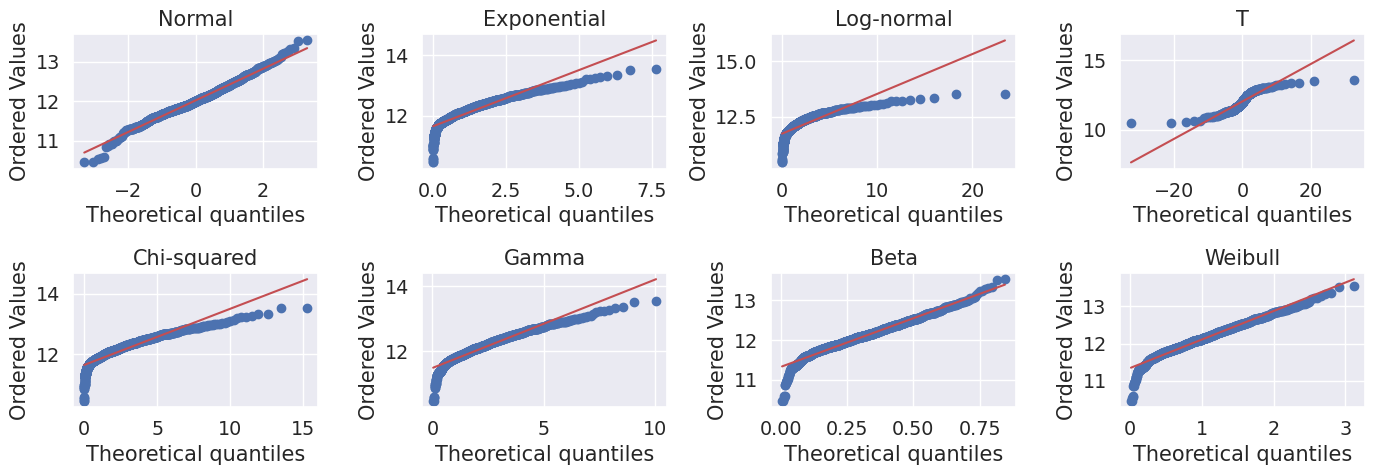

In [353]:
fig5, ax5 = plt.subplots(nrows=2,ncols=4, figsize=(14,5))
distributions = ["norm", "expon", "lognorm", "t", "chi2", "gamma", "beta", "weibull_min"]
titles = ["Normal", "Exponential", "Log-normal", "T", "Chi-squared", "Gamma", "Beta", "Weibull"]
sparams = [(), (), (0.954,), (2,), (2,), (2,), (2, 5), (1.79,)]

for dist, sparam, ax, title in zip(distributions, sparams, ax5.flatten(), titles):
    stats.probplot(df_target_train_norm, dist=dist, sparams=sparam, plot=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

*italicised text*### Overall Quality
The overall quality is os ordinal and we can see overall quality is *normaly* distributed from the *QQPlots*. Additionally, there is a
positive correlation between sale price and overall quality; the sale price increases as the quality increases.
From figure **TODO** we can see that some prices are *significantly* above the whiskers and we will have to investigate them.
Also the categories are normally distributed and as the quality increases so does the sale price, showing a positive correlation**TODO**.

| Score | Description    |
|:------|:---------------|
| 10    | Very Excellent |
| 9     | Excellent      |
| 8     | Very Good      |
| 7     | Good           |
| 6     | Above Average  |
| 5     | Average        |
| 4     | Below Average  |
| 3     | Fair           |
| 2     | Poor           |
| 1     | Very Poor      |


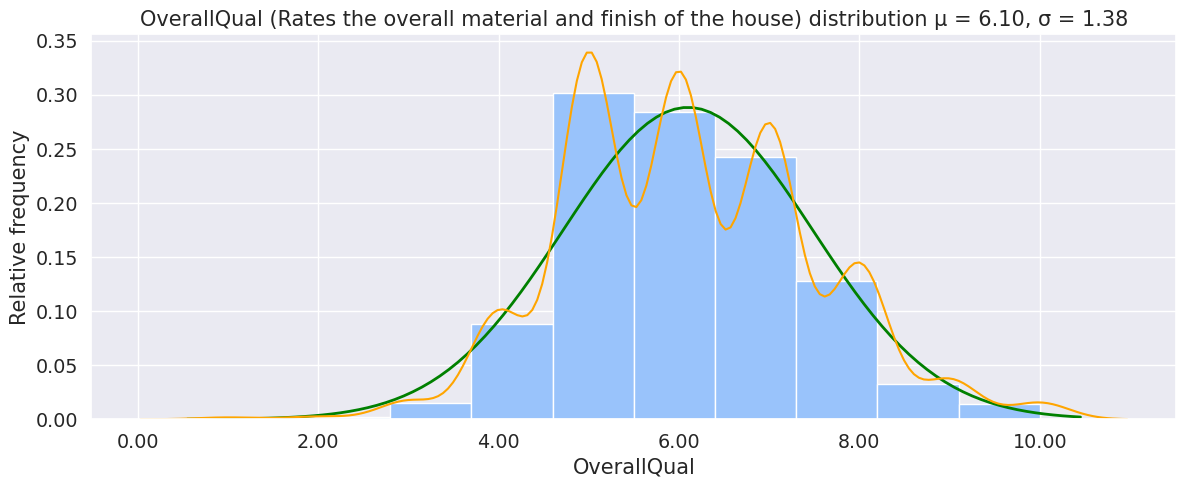

In [354]:
fig4, ax4 = plt.subplots(figsize=(14,5))
plt.hist(df_corr_train['OverallQual'], bins=10, density=True, color=primary_colour)
ax4.xaxis.set_major_formatter(ticker.FuncFormatter(with_commas))
plt.title("OverallQual: Rates the overall material and finish of the house")
# Calculate average and standard deviation
mu, std = df_corr_train['OverallQual'].mean(), df_corr_train['OverallQual'].std()

plt.title(f"OverallQual (Rates the overall material and finish of the house) distribution μ = {mu:.2f}, σ = {std:.2f}")
plt.ylabel("Relative frequency")

# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)

plt.ylabel("Relative frequency")
sns.kdeplot(df_corr_train['OverallQual'], color=highlight_colour)
plt.show()

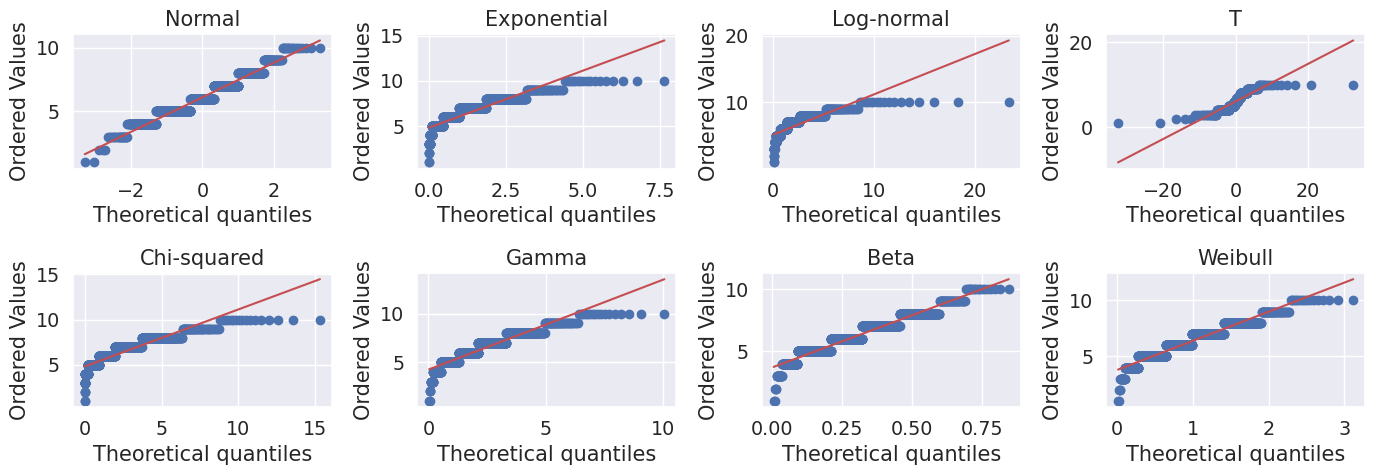

In [355]:
fig5, ax5 = plt.subplots(nrows=2,ncols=4, figsize=(14,5))
distributions = ["norm", "expon", "lognorm", "t", "chi2", "gamma", "beta", "weibull_min"]
titles = ["Normal", "Exponential", "Log-normal", "T", "Chi-squared", "Gamma", "Beta", "Weibull"]
sparams = [(), (), (0.954,), (2,), (2,), (2,), (2, 5), (1.79,)]

for dist, sparam, ax, title in zip(distributions, sparams, ax5.flatten(), titles):
    stats.probplot(df_corr_train['OverallQual'], dist=dist, sparams=sparam, plot=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [356]:
fig = px.box(df_corr_train, x='OverallQual', y='SalePrice')
fig.show()



```
# This is formatted as code
```

### Above Ground Living Area
The GrLivArea is a continous numeraical vriable. Below we can see that there is a positive correlation between the *GrLivArea* and *SalePrice* with an
pearson r value of **0.71** which is expected. Ideally houses with larger living areas will warrant higher
sale prices but there are some outliers and we'll have to investigate to see why some houses don't follow the trend.
Turns out the two houses that have large living area but their price is not that high does not follow the norm because
the are not completed and are from the Edwards neighourhood. We will try and remove these outliers later to see if they
have an effect on the accuracy against the test set.

 `Partial - Home was not completed when last assessed (associated with New Homes)`


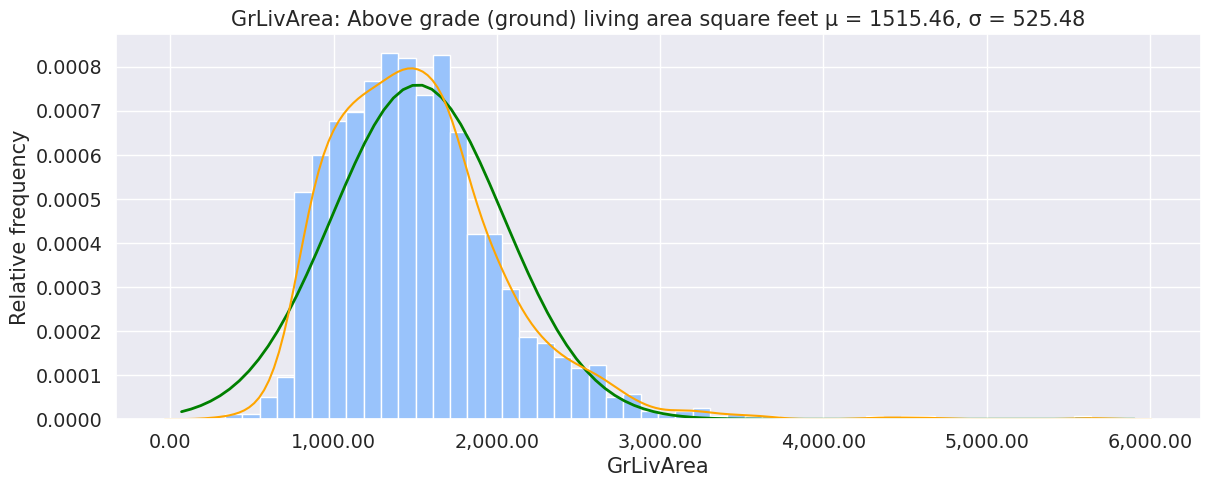

In [357]:
fig4, ax4 = plt.subplots(figsize=(14,5))
plt.hist(df_corr_train['GrLivArea'], bins=50, density=True, color=primary_colour)
ax4.xaxis.set_major_formatter(ticker.FuncFormatter(with_commas))
mu, std = df_corr_train['GrLivArea'].mean(), df_corr_train['GrLivArea'].std()

plt.title(f"GrLivArea: Above grade (ground) living area square feet μ = {mu:.2f}, σ = {std:.2f}")
plt.ylabel("Relative frequency")
# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)

sns.kdeplot(df_corr_train['GrLivArea'], color=highlight_colour)
plt.show()

In [358]:
summary(df_corr_train['GrLivArea'])

|           |   Min. | 1st Qu.   | Median   | Mean     | 3rd Qu.   | Max.     |   NA's |
|:----------|-------:|:----------|:---------|:---------|:----------|:---------|-------:|
| GrLivArea |    334 | 1,129.50  | 1,464.00 | 1,515.46 | 1,776.75  | 5,642.00 |      0 |

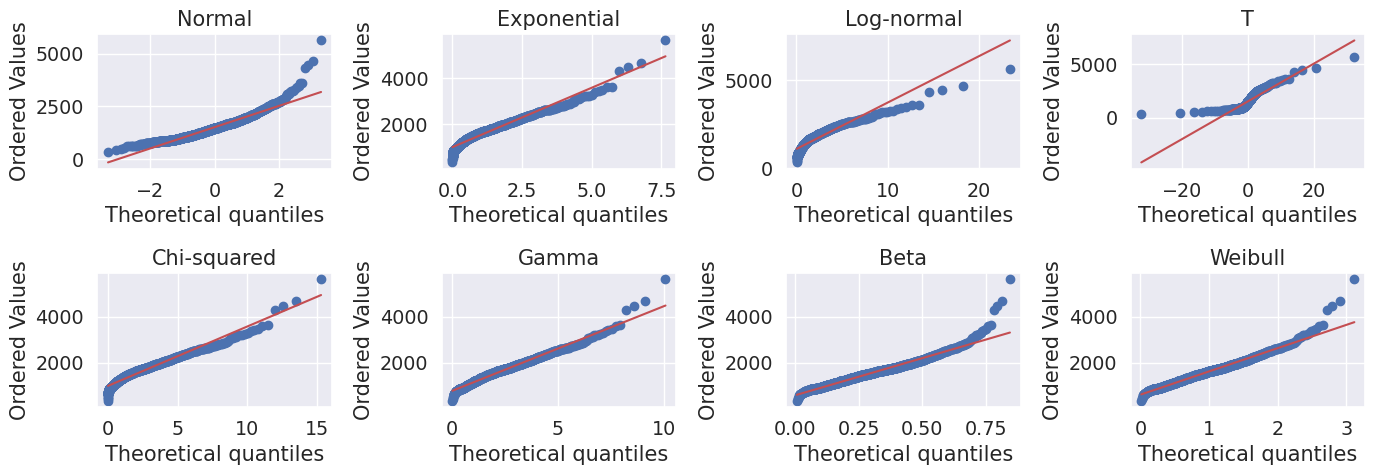

In [359]:
fig5, ax5 = plt.subplots(nrows=2,ncols=4, figsize=(14,5))
distributions = ["norm", "expon", "lognorm", "t", "chi2", "gamma", "beta", "weibull_min"]
titles = ["Normal", "Exponential", "Log-normal", "T", "Chi-squared", "Gamma", "Beta", "Weibull"]
sparams = [(), (), (0.954,), (2,), (2,), (2,), (2, 5), (1.79,)]

for dist, sparam, ax, title in zip(distributions, sparams, ax5.flatten(), titles):
    stats.probplot(df_corr_train['GrLivArea'], dist=dist, sparams=sparam, plot=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [360]:
fig = go.Figure(data=go.Violin(y=df_corr_train['GrLivArea'], box_visible=True,
meanline_visible=True, fillcolor=primary_colour, x0='GrLivArea: Above grade (ground) living area square feet', ))
fig.show(renderer='iframe_connected')

In [361]:
fig = px.scatter(df_corr_train, x='GrLivArea', y='SalePrice', color='Neighborhood', title='GrLivArea vs Sale Price colored by Neighbourhood')
fig.show()

In [362]:
ddf = df_corr_train[df_corr_train['Neighborhood'] == "Edwards"]
x = ddf[ddf['SaleCondition'] == 'Partial']
x[['Neighborhood','SaleCondition','GrLivArea','SalePrice']]

,Neighborhood,SaleCondition,GrLivArea,SalePrice
117,Edwards,Partial,1125,155000
1297,Edwards,Partial,1072,140000
1298,Edwards,Partial,5642,160000
523,Edwards,Partial,4676,184750


In [363]:
df_corr_train.drop([523, 1298], inplace=True)
ddf = df_corr_train[df_corr_train['Neighborhood'] == "Edwards"]
x = ddf[ddf['SaleCondition'] == 'Partial']
x[['Neighborhood','SaleCondition','GrLivArea','SalePrice']]

,Neighborhood,SaleCondition,GrLivArea,SalePrice
117,Edwards,Partial,1125,155000
1297,Edwards,Partial,1072,140000


In [364]:
fig = px.scatter(df_corr_train, x='GrLivArea', y='SalePrice', color='SaleCondition', title='GrLivAreacolored by Neighbourhood')
fig.show()

[link text](https://)### GarageCars: Size of garage in car capacity
The GarageCars is descrete numerical varibale but when diplaying violin plots we are going to treat it as an ordinal categorical variable;
since the numbers are limited from 1-4 .There is an increase in sale price until **4** cars in the parking
lot then there's a drop in the price which is odd; we'll have to investigate further.
TODO: Investigate why price falls when parking can accomodate **4** cars.

In [365]:
fig = go.Figure()
df_garage_cars_train = pd.DataFrame()
df_garage_cars_train['GarageCars'] = df_corr_train['GarageCars'].astype(str)
df_garage_cars_train['SalePrice'] = df_corr_train['SalePrice']
garage_cars = df_garage_cars_train['GarageCars'].unique()

for garage_car in garage_cars:
    fig.add_trace(go.Violin(x=df_garage_cars_train['GarageCars'][df_garage_cars_train['GarageCars'] == garage_car],
                                y=df_garage_cars_train['SalePrice'][df_garage_cars_train['GarageCars'] == garage_car],
                                name=garage_car,
                                box_visible=True,
                                meanline_visible=True))
    fig.update_xaxes(title='Garage Cars')
    fig.update_xaxes(title='Sale Price(USD)')

fig.show()

### GarageArea: Size of garage in square feet
The Garage Area has a non normal dstribution; Most of the houses that have large garage areas have higher have higher prices but there are some exceptions.
There are also some houses that have no garages but their prices are slightly high, this could be because of other factors.

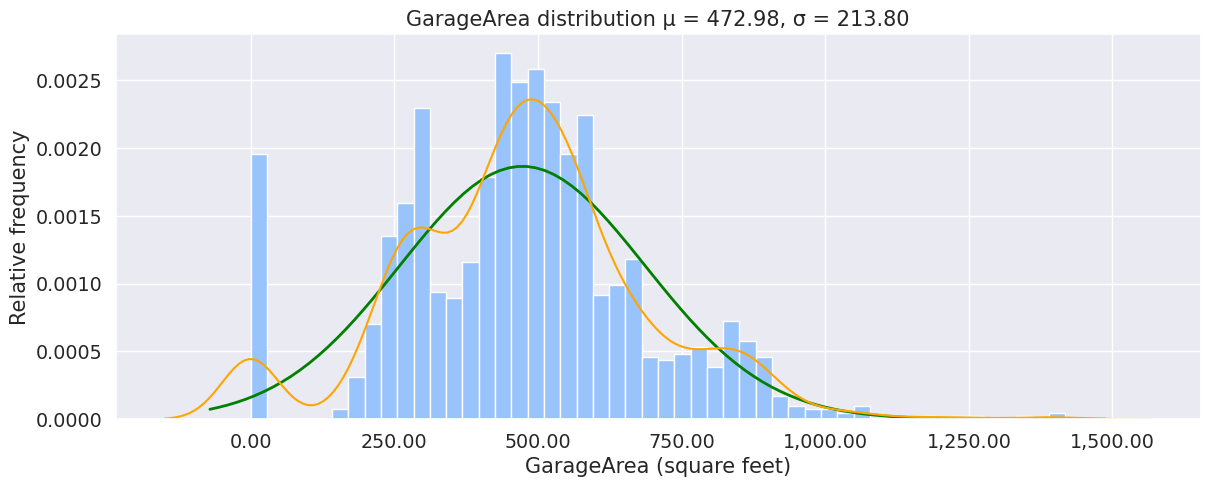

In [366]:
fig_sale_price_dist, ax_sale_price_dist = plt.subplots(figsize=(14,5))
plt.hist(df_step_1_train['GarageArea'], bins=50, density=True, color=primary_colour)
ax_sale_price_dist.xaxis.set_major_formatter(ticker.FuncFormatter(with_commas))
# Calculate average and standard deviation
mu, std = df_step_1_train['GarageArea'].mean(), df_step_1_train['GarageArea'].std()
plt.title(f"GarageArea distribution μ = {mu:.2f}, σ = {std:.2f}")
plt.ylabel("Relative frequency")
plt.xlabel("GarageArea (square feet)")
# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)
sns.kdeplot(df_step_1_train['GarageArea'], color=highlight_colour)
plt.show()

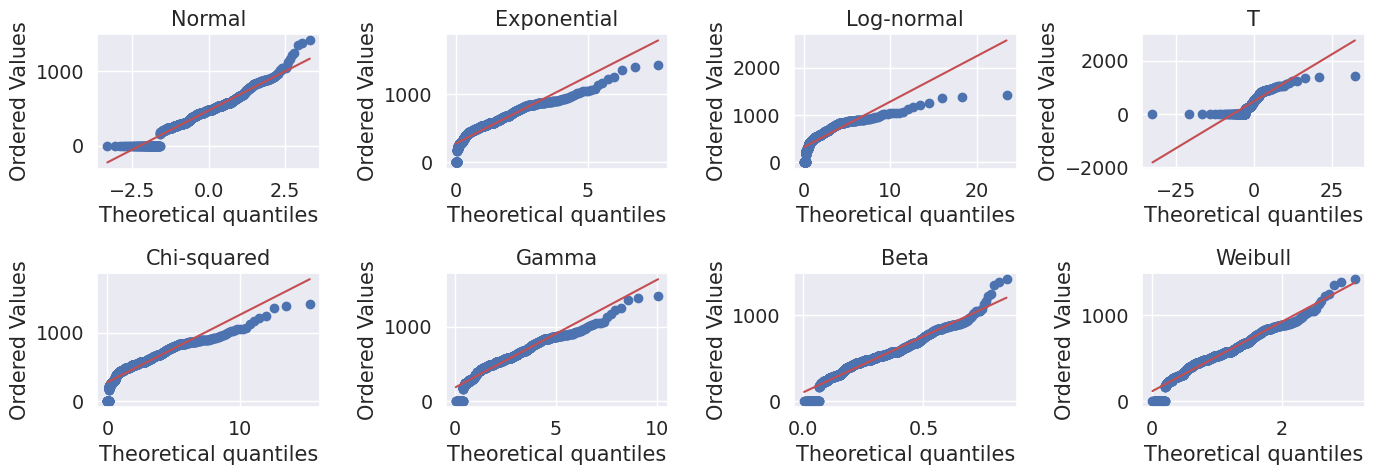

In [367]:
fig5, ax5 = plt.subplots(nrows=2,ncols=4, figsize=(14,5))
distributions = ["norm", "expon", "lognorm", "t", "chi2", "gamma", "beta", "weibull_min"]
titles = ["Normal", "Exponential", "Log-normal", "T", "Chi-squared", "Gamma", "Beta", "Weibull"]
sparams = [(), (), (0.954,), (2,), (2,), (2,), (2, 5), (1.79,)]

for dist, sparam, ax, title in zip(distributions, sparams, ax5.flatten(), titles):
    stats.probplot(df_step_1_train['GarageArea'], dist=dist, sparams=sparam, plot=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [368]:
fig = go.Figure(data=go.Violin(y=df_step_1_train['GarageArea'], box_visible=True,
meanline_visible=True, fillcolor=primary_colour, x0='GarageArea (square feet)', ))
fig.show()

In [369]:
fig = px.scatter(df_train, x='GarageArea', y='SalePrice', color='GarageType', title='Garage Area vs Sale Price colored by GarageType')
fig.show(renderer='iframe_connected')

### GarageYrBlt: Year garage was built
It looks like there was a significant change in house sale price between **1944** and **1947**, this could
be attributed to the *2nd World War*. Additionally, there is a dip in prices between **2007** and **2010** which
coincides with the **2007** - **2009** *US* financial crisis.There is also an interesting pattern between
~ **1980** and **1998** not sure what that is.

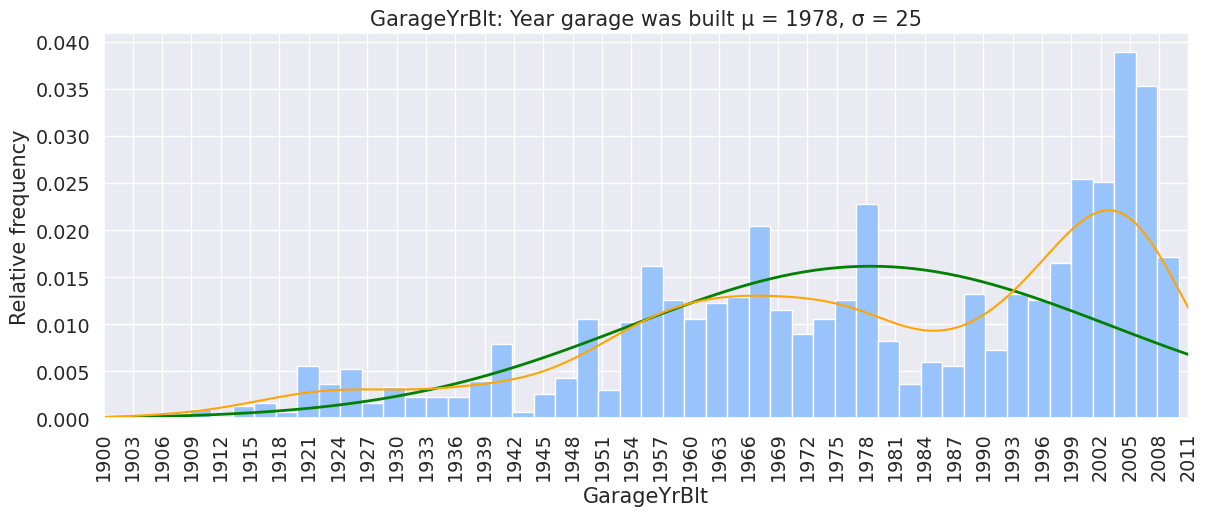

In [370]:
min_value = df_corr_train['GarageYrBlt'].min()
max_value = df_corr_train['GarageYrBlt'].max()
step = 3

fig4, ax4 = plt.subplots(figsize=(14,5))
bins = int((max_value+min_value)/3)
plt.hist(df_corr_train['GarageYrBlt'], bins=50, density=True, color=primary_colour)
plt.xlim(min_value, max_value)
plt.xticks(np.arange(min_value, max_value + step, step), rotation=90)
# Calculate average and standard deviation
mu, std = df_corr_train['GarageYrBlt'].mean(), df_corr_train['GarageYrBlt'].std()

plt.title(f"GarageYrBlt: Year garage was built μ = {mu:.0f}, σ = {std:.0f}")
plt.ylabel("Relative frequency")

# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)

plt.ylabel("Relative frequency")
sns.kdeplot(df_corr_train['GarageYrBlt'], color=highlight_colour)
plt.show()

### YearBuilt: Original construction date
It looks like there was a significant change in house sale price between **1944** and **1947**, this could
be attributed to the *2nd World War*. Additionally, there is a dip in prices between **2007** and **2010** which
coincides with the **2007** - **2009** *US* financial crisis.There is also an interesting pattern between
~ **1980** and **1998** not sure what that is.

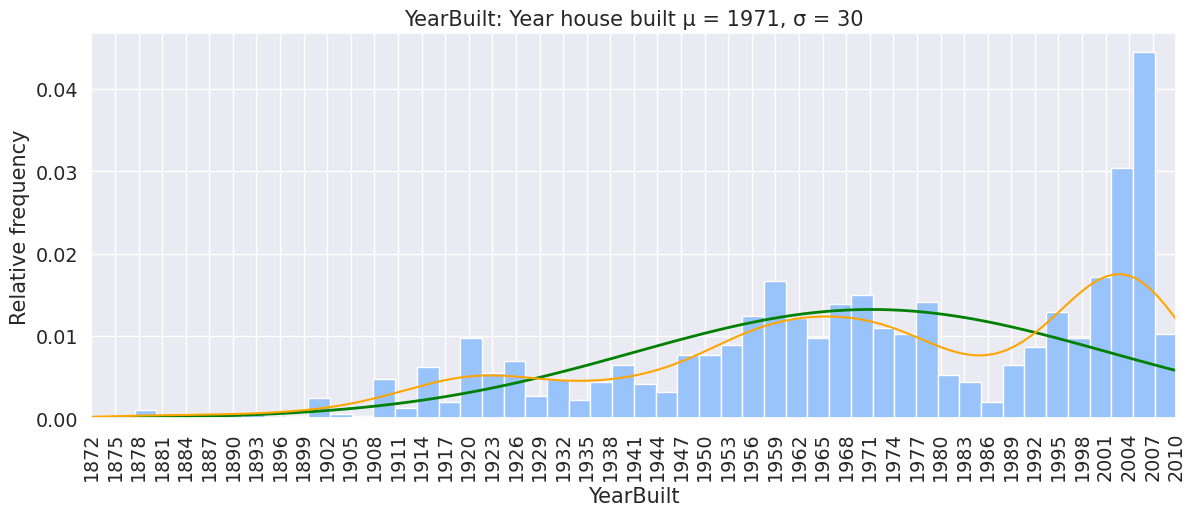

In [371]:
min_value = df_corr_train['YearBuilt'].min()
max_value = df_corr_train['YearBuilt'].max()
step = 3

fig4, ax4 = plt.subplots(figsize=(14,5))
bins = int((max_value+min_value)/3)
plt.hist(df_corr_train['YearBuilt'], bins=50, density=True, color=primary_colour)
plt.xlim(min_value, max_value)
plt.xticks(np.arange(min_value, max_value + step, step), rotation=90)
# Calculate average and standard deviation
mu, std = df_corr_train['YearBuilt'].mean(), df_corr_train['YearBuilt'].std()

plt.title(f"YearBuilt: Year house built μ = {mu:.0f}, σ = {std:.0f}")
plt.ylabel("Relative frequency")

# Plot the theoretical normal distribution
xmin, xmax = plt.xlim() # Get limits for x axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color=green_colour, linewidth=2)

plt.ylabel("Relative frequency")
sns.kdeplot(df_corr_train['YearBuilt'], color=highlight_colour)
plt.show()

### GarageType: Garage location
| Garage Types | Description                                                                |
|:-------------|:---------------------------------------------------------------------------|
| 2Types       | More than one type of garage                                               |
| Attchd       | Attached to home                                                           |
| Basment      | Basement Garage                                                            |
| BuiltIn      | Built-In (Garage part of house - typically has room above garage)          |
| CarPort      | Car Port                                                                   |
| Detchd       | Detached from home                                                         |
| NA           | No Garage  

In [372]:
# Find out why some houses have higher prices
top_10_sale_price_index = df_corr_train['SalePrice'].sort_values(ascending=False).head(10).index
top_10_sale_price_index

Int64Index([691, 1182, 1169, 898, 803, 1046, 440, 769, 178, 798], dtype='int64')

In [373]:
df_corr_train.loc[top_10_sale_price_index][['Neighborhood','SalePrice','SaleCondition', 'YrSold','GrLivArea', 'LotFrontage', 'OverallQual','YearBuilt']]

,Neighborhood,SalePrice,SaleCondition,YrSold,GrLivArea,LotFrontage,OverallQual,YearBuilt
691,NoRidge,755000,Normal,2007,4316,104.0,10,1994
1182,NoRidge,745000,Abnorml,2007,4476,160.0,10,1996
1169,NoRidge,625000,Normal,2006,3627,118.0,10,1995
898,NridgHt,611657,Partial,2010,2364,100.0,9,2009
803,NridgHt,582933,Partial,2009,2822,107.0,9,2008
1046,StoneBr,556581,Partial,2006,2868,85.0,9,2005
440,NridgHt,555000,Normal,2009,2402,105.0,10,2008
769,StoneBr,538000,Normal,2010,3279,47.0,8,2003
178,StoneBr,501837,Partial,2009,2234,63.0,9,2008
798,NridgHt,485000,Partial,2009,3140,104.0,9,2008


The two outliers that have a quality of **10** are from the *NoRidge* nieghbourhood. Later on we will see if removing them yeilds any significant accuracy gain

In [374]:
# df_step_1_train[df_step_1_train['SalePrice'] > 625000]['Id']

In [375]:
row_indexes_to_drop = [692,1183]

#### Garage Year Built and House Year Built

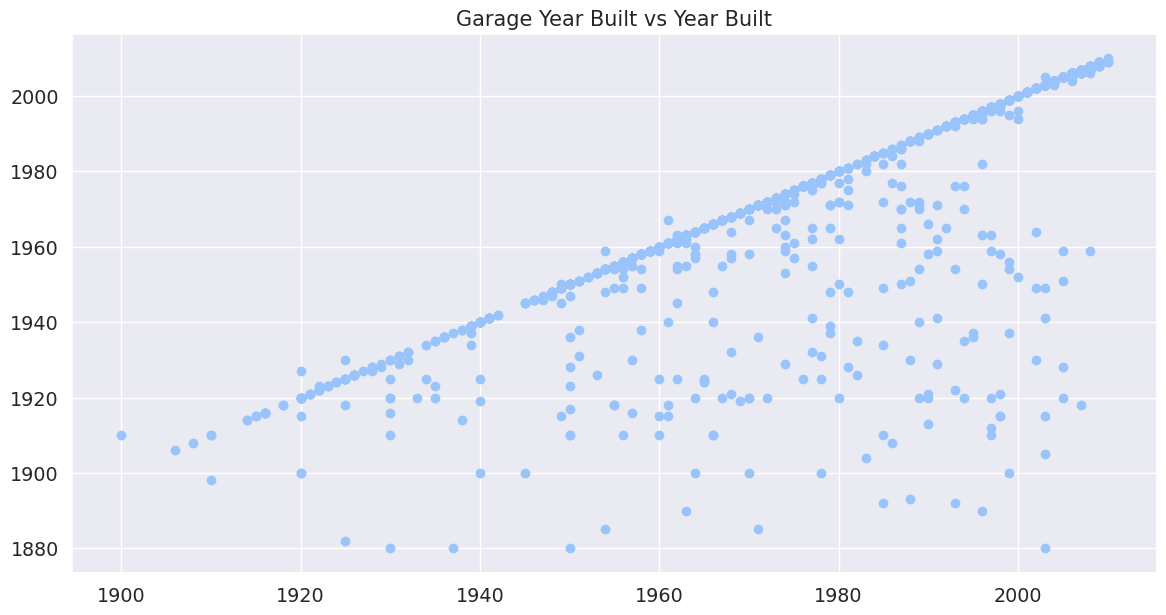

In [376]:
fig4, ax4 = plt.subplots(figsize=(14,7))
plt.scatter(df_corr_train['GarageYrBlt'], df_corr_train['YearBuilt'], color=primary_colour)
plt.title("Garage Year Built vs Year Built")
plt.show()

Most of the garages that were built the same year as the house are attached to

---

the house followed by the ones that are detached to the house.

In [377]:
eq_match_percentage = (df_corr_train['GarageYrBlt'] == df_corr_train['YearBuilt']).mean() * 100
print(f"Percentage of garages built the same year as the house: {eq_match_percentage:.2f}%")
df_corr_train[df_corr_train['GarageYrBlt'] == df_corr_train['YearBuilt']]['GarageType'].value_counts()

Percentage of garages built the same year as the house: 74.55%


Attchd     806
Detchd     179
BuiltIn     75
Basment     18
CarPort      7
2Types       2
Name: GarageType, dtype: int64

Most of the garages that were built after the house was built are detatched to

---

the house followed by the ones that are attached to the house.

In [378]:
gt_match_percentage = (df_corr_train['GarageYrBlt'] > df_corr_train['YearBuilt']).mean() * 100
print(f"Percentage of garages built after the house was built: {gt_match_percentage:.2f}%")
df_corr_train[df_corr_train['GarageYrBlt'] > df_corr_train['YearBuilt']]['GarageType'].value_counts()

Percentage of garages built after the house was built: 19.27%


Detchd     202
Attchd      63
BuiltIn      9
2Types       4
CarPort      2
Basment      1
Name: GarageType, dtype: int64

There is a small percentage of dettached and builtin garages that were built before the house was built.

> Indented block



In [379]:
lt_match_percentage = (df_corr_train['GarageYrBlt'] < df_corr_train['YearBuilt']).mean() * 100
print(f"Percentage of garages built before the house: {lt_match_percentage:.2f}%")
df_corr_train[df_corr_train['GarageYrBlt'] < df_corr_train['YearBuilt']]['GarageType'].value_counts()

Percentage of garages built before the house: 0.62%


Detchd     6
BuiltIn    3
Name: GarageType, dtype: int64

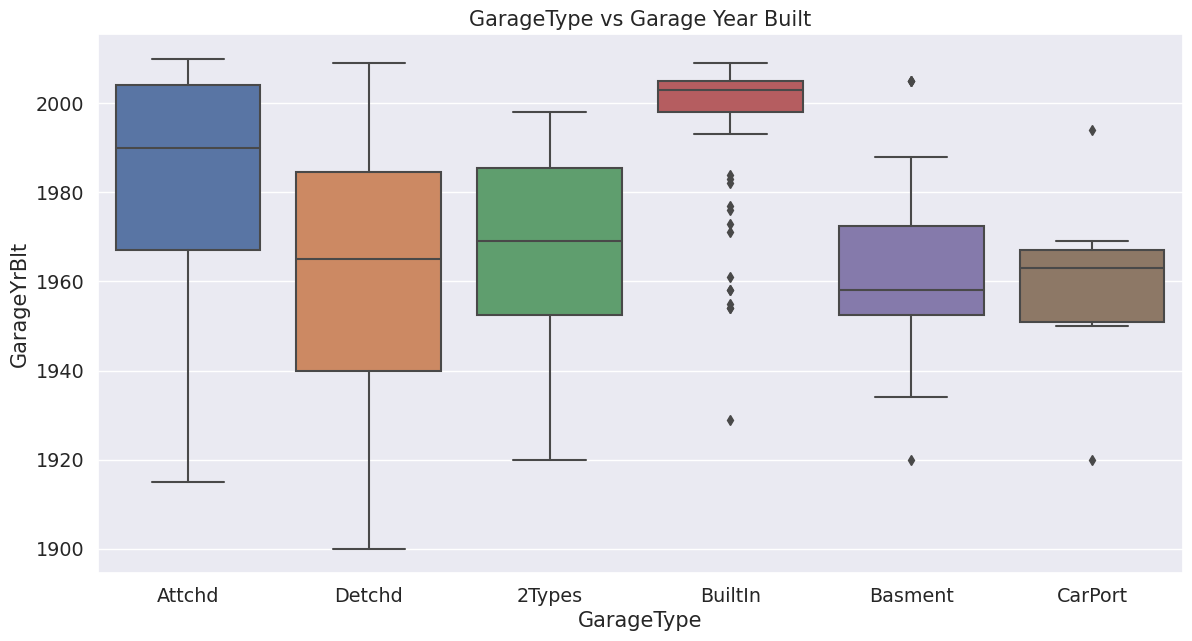

In [380]:
# Use garage type to give context to garage year built
# GarageType
fig7, ax7 = plt.subplots(figsize=(14,7))
sns.boxplot(x='GarageType', y='GarageYrBlt', data=df_corr_train)
plt.title("GarageType vs Garage Year Built")
plt.show()

In [381]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)


In [382]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df_corr_train['GarageYrBlt'], df_corr_train['YearBuilt'])
chi2, p, dof, expected = chi2_contingency(crosstab)
# print("\nChi2 Stat:", chi2)
print("P Value:", p)
# TODO: Why is p-value 0.0?

P Value: 0.0


**bold text**### YearSold

The column has no null values and most houses were sold in 2009 which is not significantly higher compare to the 2 years prior. Although there was significant a drop in sales in 2010; this could just mean we do not have enough data.

In [383]:
df_corr_train['YrSold'].isnull().sum()

0

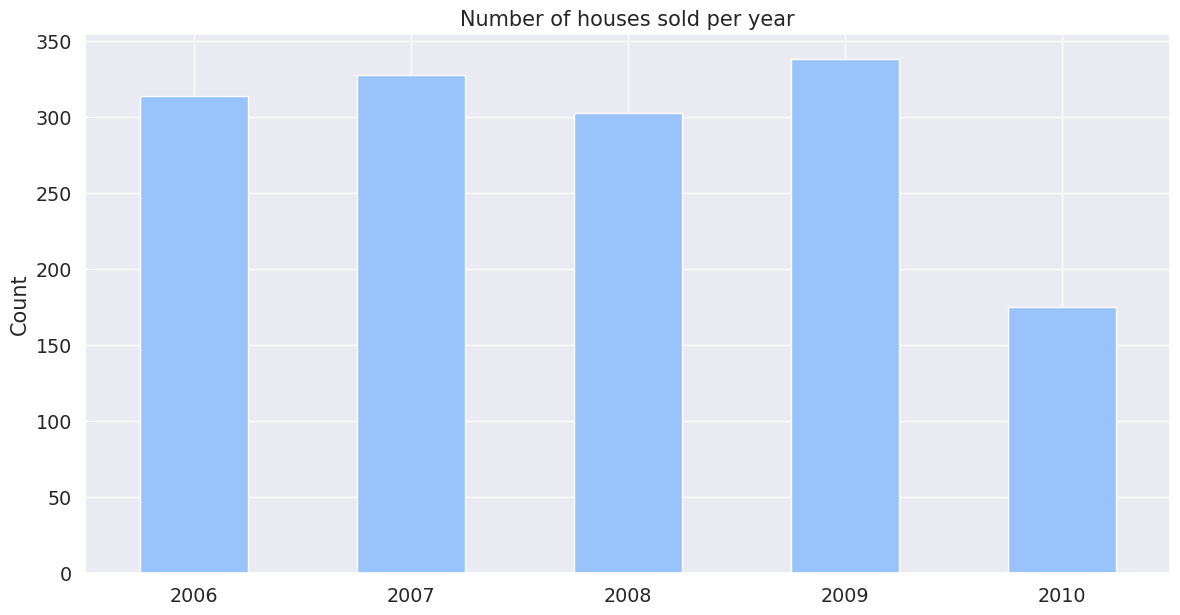

In [384]:
fig4, ax4 = plt.subplots(figsize=(14,7))
df_corr_train['YrSold'].sort_values(ascending=True).value_counts(sort=False).plot(kind='bar', color=primary_colour)
plt.title("Number of houses sold per year")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [385]:
df_corr_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

### Neighborhood: Physical locations within Ames city limits

*   List item
*   List item




<table>
<tr>
<td>

| Abbreviation | Full Name                                  |
|--------------|--------------------------------------------|
| Blmngtn      | Bloomington Heights                        |
| Blueste      | Bluestem                                   |
| BrDale       | Briardale                                  |
| BrkSide      | Brookside                                  |
| ClearCr      | Clear Creek                                |
| CollgCr      | College Creek                              |
| Crawfor      | Crawford                                   |
| Edwards      | Edwards                                    |
| --           | --                                         |    

</td>
<td>

| Abbreviation | Full Name                                  |
|--------------|--------------------------------------------|
| Gilbert      | Gilbert                                    |
| IDOTRR       | Iowa DOT and Rail Road                     |
| MeadowV      | Meadow Village                             |
| Mitchel      | Mitchell                                   |
| Names        | North Ames                                 |
| NoRidge      | Northridge                                 |
| NPkVill      | Northpark Villa                            |
| NridgHt      | Northridge Heights                         |
| --           | --                                         |     

</td>
<td>

| Abbreviation | Full Name                                  |
|--------------|--------------------------------------------|
| NWAmes       | Northwest Ames                             |
| OldTown      | Old Town                                   |
| SWISU        | South & West of Iowa State University      |
| Sawyer       | Sawyer                                     |
| SawyerW      | Sawyer West                                |
| Somerst      | Somerset                                   |
| StoneBr      | Stone Brook                                |
| Timber       | Timberland                                 |
| Veenker      | Veenker                                    |

</td>
</tr>
</table>


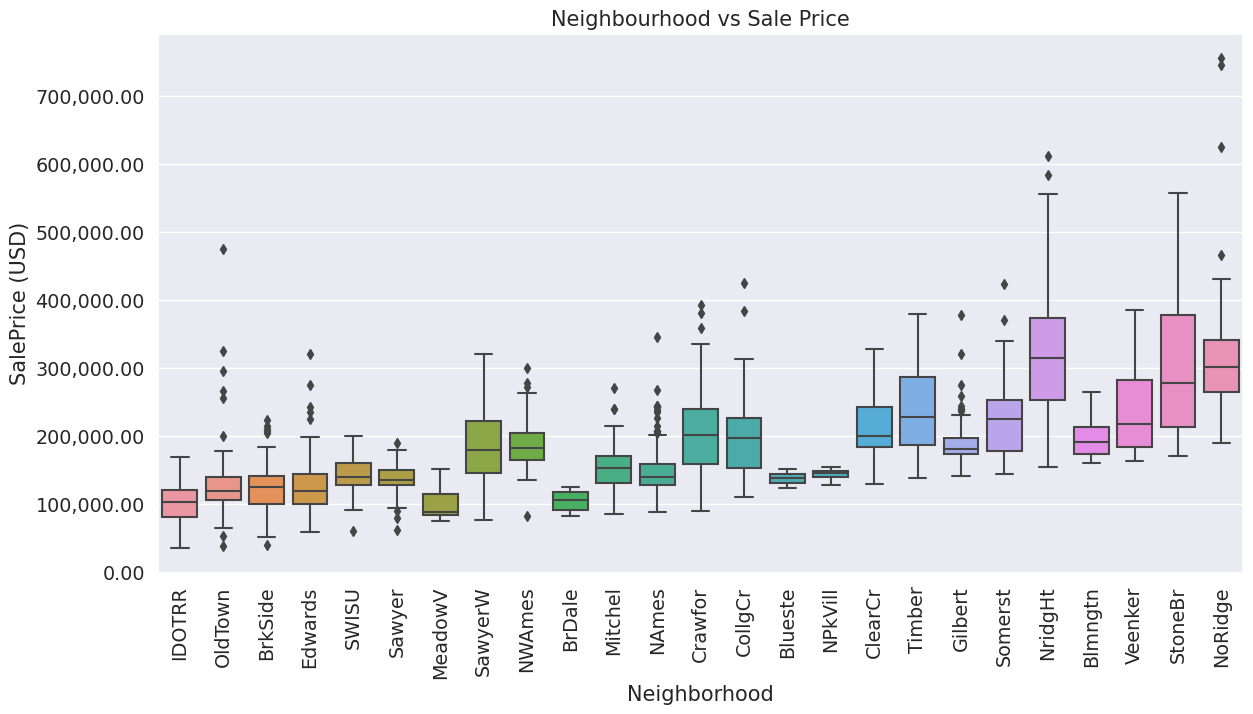

In [386]:
fig7, ax7 = plt.subplots(figsize=(14,7))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_corr_train.sort_values('SalePrice'))
ax7.yaxis.set_major_formatter(ticker.FuncFormatter(with_commas))
plt.title("Neighbourhood vs Sale Price")
plt.xticks(rotation=90)
plt.ylabel("SalePrice (USD)")
plt.show()

*It* looks like some sale prices distributions by neighbourhood are *normal* e.g. Mitchel and North Ames. Briardale seems to have *bimodal* distribution.

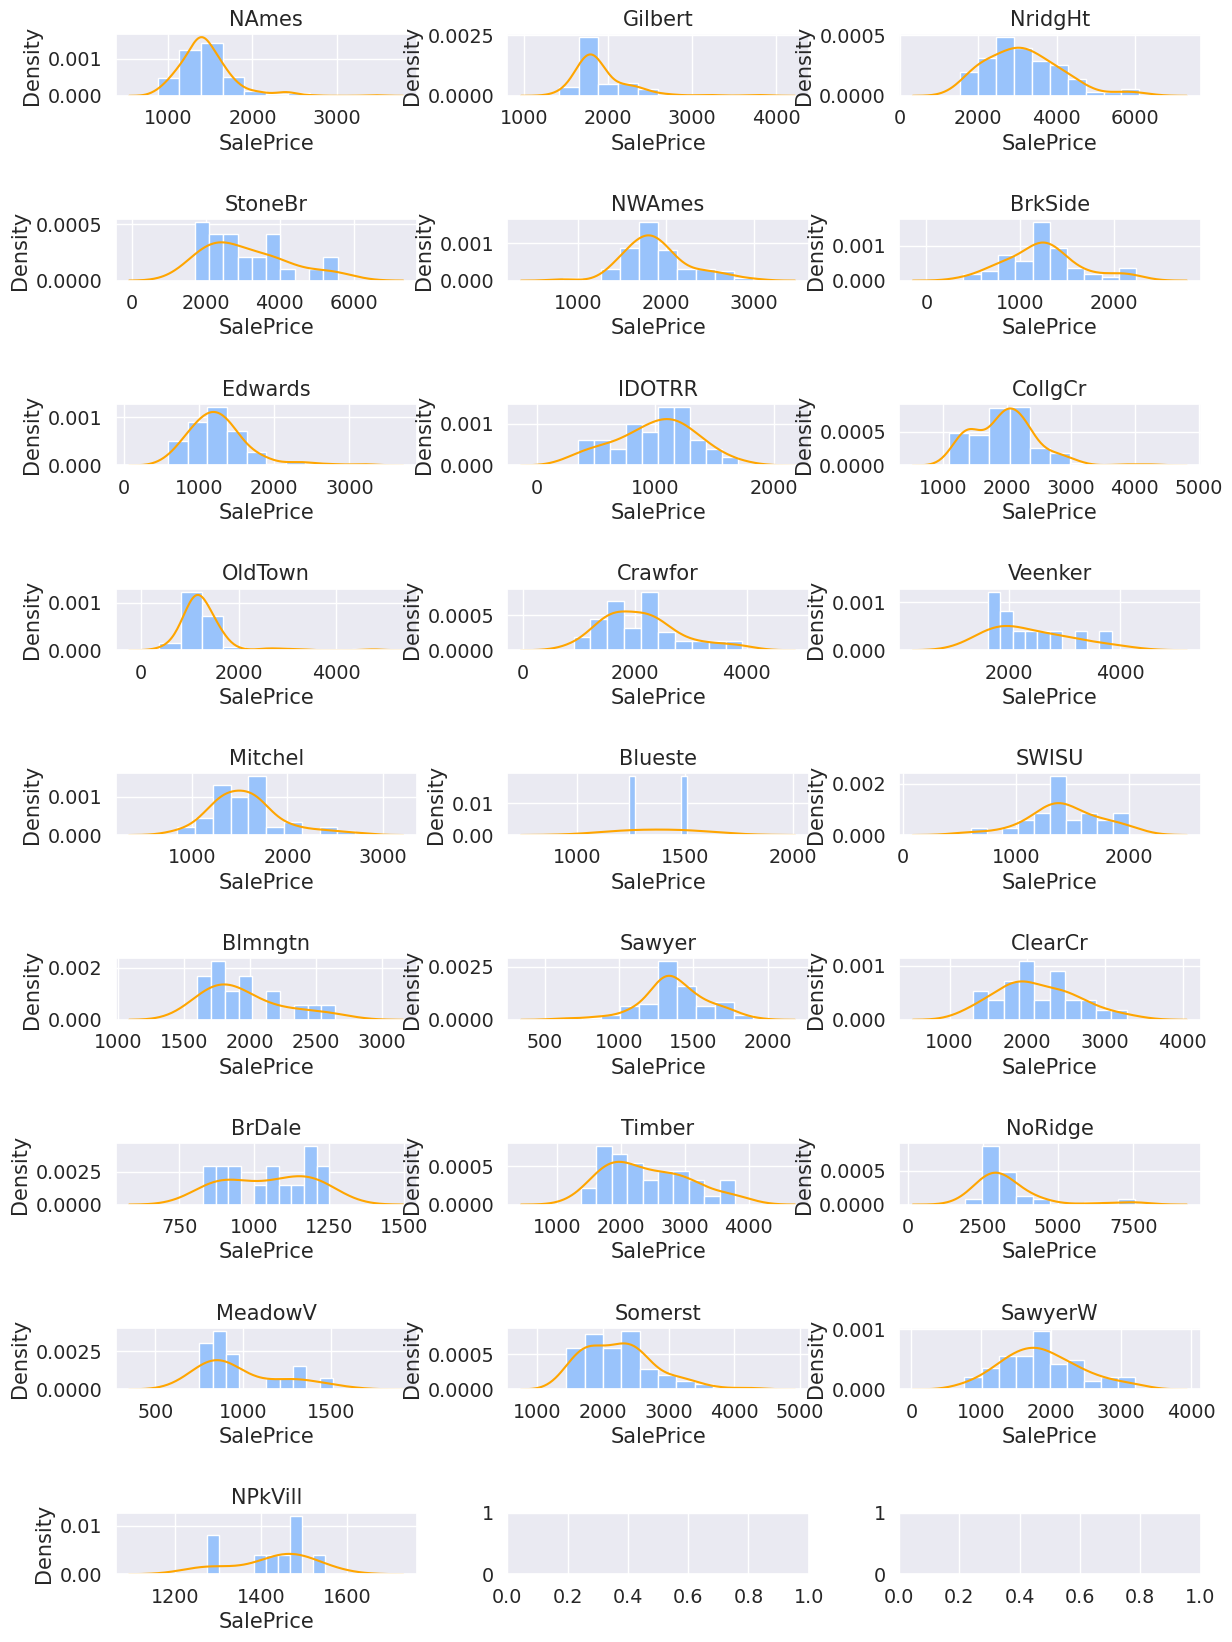

In [387]:
fig, ax0 = plt.subplots(nrows=9, ncols=3, figsize=(14,20))
fig.subplots_adjust(wspace=0.3, hspace=2)  # Adjust horizontal and vertical spacing
neighbourhoods = df_corr_train['Neighborhood'].unique()

for neigh, ax in zip(neighbourhoods, ax0.flatten()):
    ax.hist((df_corr_train[df_corr_train['Neighborhood'] == neigh]['SalePrice']/100), density=True, color=primary_colour)
    sns.kdeplot((df_corr_train[df_corr_train['Neighborhood'] == neigh]['SalePrice']/100), color=highlight_colour, ax=ax)
    ax.set_title(neigh)

plt.show()

In [388]:
# TODO: Draw a map of Aimes, Iowa and the neighourhoods



```
# This is formatted as code
```

<a id = "modelling_n_evaluation"></a>
## Modelling and Evaluation



```
# This is formatted as code
```

Next we are going to impute the null for the categorical columns using a *most frequent strategy*; for the numerical values we are going to use a *K-Nearest neighbour* imputer to fill in the nulls; we are going to use an *K* value of *2*.
Additionally, we are going to standardize the numerical features using a *StandardScaler*. For the numerical columns we are going to *one-hot-encode* the columns which will transform them into.
**TODO**
Why did we do the tasks below?
remove the Id columnd and add it in later

In [389]:
df_xgb_top_20_train = df_step_1_train[df_clean_train.columns]

In [390]:
# df_train = df_step_1_train['OverallQual', 'GarageCars', 'KitchenAbvGr', 'GrLivArea']
X_train, X_test, y_train, y_test = train_test_split(df_xgb_top_20_train, df_target_train_norm, test_size=0.2, random_state=33)
# df_step_1_train.head()

In [391]:
# Define which columns are numerical and categorical
numerical_features = df_xgb_top_20_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_xgb_top_20_train.select_dtypes(include=['object','O']).columns

# Create transformers for each type of feature
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),  # Impute missing values with the KNN Imputer
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformations to specific columns
column_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

When using XGBoost the RMSE is pretty high ~**24769.66** and we have not done

1.   List item
2.   List item

any tuning, we will do that in the next step but first we need to get an idea of which columns are important. After normalizing the Sale Price the RMSE reduced to **0.035**, which is a great improvement; this is just on the training data and well need to submit the results on test data to know what kind of accuracy we'll get.

In [392]:
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', xgb.XGBRegressor(objective='reg:squarederror'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('XGBOOST RMSE: {}\n'.format(rmse))
rmses_scores = [rmse]
models = ['xgb(baseline)']

******************************
XGBOOST RMSE: 0.156



#### Test against test data

In [393]:
df_test = pd.read_csv('/content/drive/My Drive/ColabNotebooks/house_sale_prediction/data/test.csv')

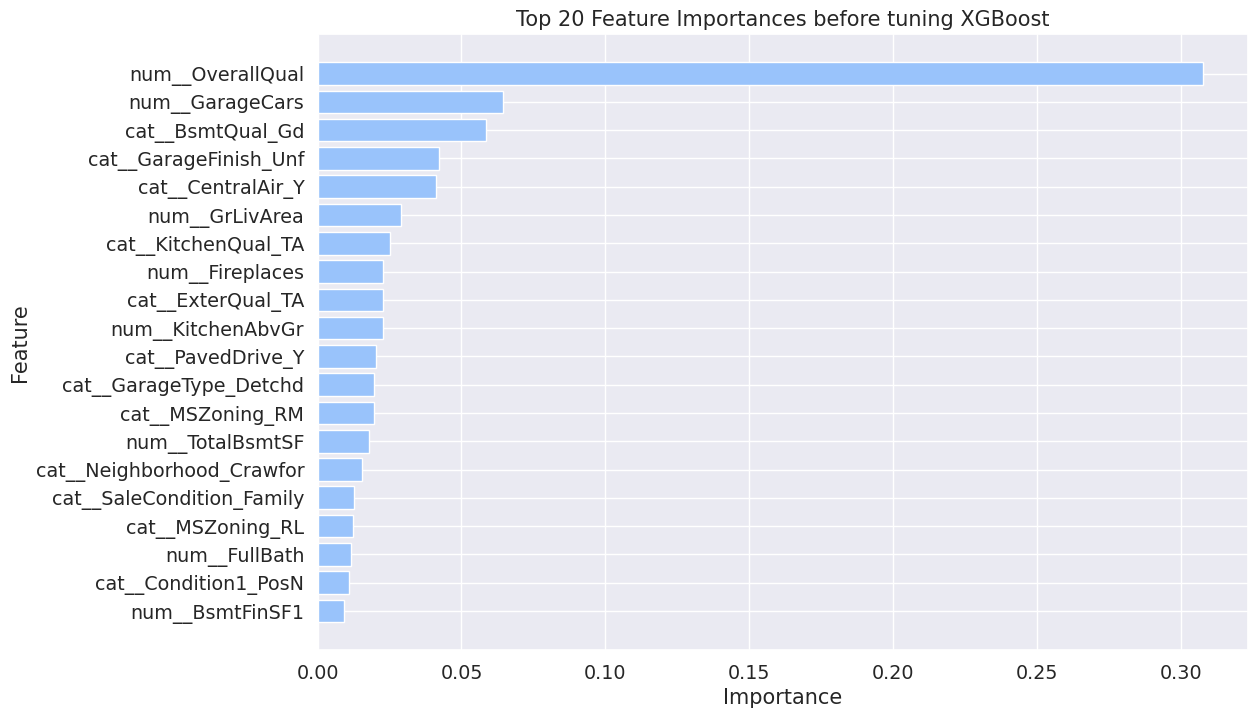

In [394]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the trained XGBoost model from the pipeline
model = pipeline.named_steps['model']

transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': model.feature_importances_
})

# Sort the DataFrame by importance in descending order and take the top 20
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color=primary_colour)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances before tuning XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## Hyperparameter Optimization

### XGBoost

In [395]:
param_grid = {
    'model__n_estimators': [100, 150, 200],     # Number of trees in the forest
    'model__learning_rate': [0.01, 0.05, 0.1,0.15], # Learning rate for boosting
    'model__max_depth': [2, 3, 4],             # Maximum depth of each tree
    # Add other hyperparameters and values as needed
}

In [396]:
## Hyperparameter optimization using RandomizedSearchCV
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

random_search=RandomizedSearchCV(pipeline,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=False)
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_


 Time taken: 0 hours 0 minutes and 26.39 seconds.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlr...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.15,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [397]:
random_search.best_params_

{'model__n_estimators': 200,
 'model__max_depth': 3,
 'model__learning_rate': 0.15}

In [398]:
# Define the parameter dictionary
param_dict = {'model__n_estimators': 150,
 'model__max_depth': 5,
 'model__learning_rate': 0.1}

pipeline.set_params(**param_dict)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlr...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=150, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [399]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('XGBoost RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('xgb(tuned)')

******************************
XGBoost RMSE: 0.142



### Predict using test data

In [400]:
predictions = pipeline.predict(df_test)
test_ids = df_test.Id
df_xgb_submission = pd.DataFrame()
df_xgb_submission['Id'] = test_ids
df_xgb_submission['SalePrice'] = pd.Series(np.exp(predictions))

df_xgb_submission.to_csv('xgb_output.csv', index=False)

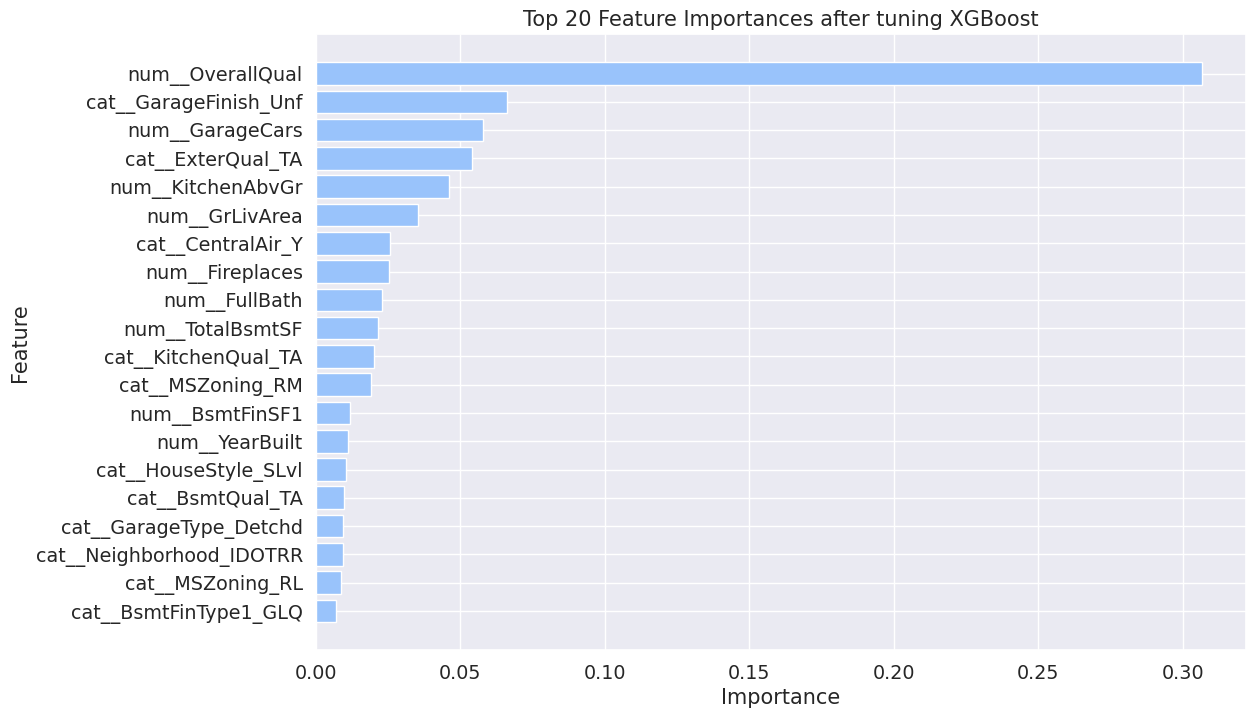

In [401]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the trained XGBoost model from the pipeline
model = pipeline.named_steps['model']

transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': model.feature_importances_
})

# Sort the DataFrame by importance in descending order and take the top 20
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color=primary_colour)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances after tuning XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [402]:
top_20_features

,Feature,Importance
3,num__OverallQual,0.306615
198,cat__GarageFinish_Unf,0.066118
22,num__GarageCars,0.057676
142,cat__ExterQual_TA,0.053924
20,num__KitchenAbvGr,0.045914
14,num__GrLivArea,0.035298
178,cat__CentralAir_Y,0.025687
21,num__Fireplaces,0.025309
17,num__FullBath,0.022902
11,num__TotalBsmtSF,0.021629


### Linear Regression

In [403]:
from sklearn.linear_model import LinearRegression

pipeline.set_params(model=LinearRegression())

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('Linear Regression RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('LinReg')

******************************
Linear Regression RMSE: 0.188



In [404]:
predictions = pipeline.predict(df_test)
df_xgb_submission['SalePrice'] = pd.Series(np.exp(predictions))

df_xgb_submission.to_csv('linear_reg_output.csv', index=False)

### Ridge Regression (L1)

In [405]:
from sklearn.linear_model import Ridge

pipeline.set_params(model=Ridge(alpha=0.1))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('Ridge Regression RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('Ridge')

******************************
Ridge Regression RMSE: 0.186



In [406]:
param_grid = {'model__alpha': np.logspace(-6, 6, 13)}
random_search=RandomizedSearchCV(pipeline,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=False)
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_


 Time taken: 0 hours 0 minutes and 10.4 seconds.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlr...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', Ridge(alpha=10.0))])

In [407]:
random_search.best_params_

{'model__alpha': 10.0}

In [408]:
pipeline.set_params(model=Ridge(alpha=10.0))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('Ridge (tuned) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('Ridge(tuned)')

******************************
Ridge (tuned) RMSE: 0.188



In [409]:
predictions = pipeline.predict(df_test)
df_xgb_submission['SalePrice'] = pd.Series(np.exp(predictions))

df_xgb_submission.to_csv('ridge_reg_output.csv', index=False)

### K-Nearest Neighbors

In [410]:
from sklearn.neighbors import KNeighborsRegressor

pipeline.set_params(model=KNeighborsRegressor())

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('KNN (baseline) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('KNN(baseline)')

******************************
KNN (baseline) RMSE: 0.206



In [411]:
param_grid = {
    'model__n_neighbors': range(1, 31),  # considering 1 to 30 neighbors for demonstration
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

random_search=RandomizedSearchCV(pipeline,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=False)

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_
random_search.best_params_


 Time taken: 0 hours 0 minutes and 46.83 seconds.


{'model__weights': 'distance', 'model__p': 2, 'model__n_neighbors': 7}

In [412]:
pipeline.set_params(model=KNeighborsRegressor(weights= 'distance', p= 2, n_neighbors=7))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('KNN (tuned) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('KNN(tuned)')

******************************
KNN (tuned) RMSE: 0.186



In [413]:
predictions = pipeline.predict(df_test)
df_xgb_submission['SalePrice'] = pd.Series(np.exp(predictions))

df_xgb_submission.to_csv('knn_output.csv', index=False)

### Cat Boost Regressor

In [414]:
pipeline.set_params(model=CatBoostRegressor(verbose=False))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('CatBoost (baseline) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('CatBoost(baseline)')

******************************
CatBoost (baseline) RMSE: 0.137



In [415]:
param_grid = {
    'model__iterations': np.arange(10, 2000, 500),
    'model__depth': np.arange(2, 5, 1),
    'model__learning_rate': np.arange(0.001, 0.01, 0.002),
    'model__loss_function': ['RMSE']
}

random_search=RandomizedSearchCV(pipeline,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=False)

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_
random_search.best_params_


 Time taken: 0 hours 3 minutes and 51.15 seconds.


{'model__loss_function': 'RMSE',
 'model__learning_rate': 0.009000000000000001,
 'model__iterations': 1510,
 'model__depth': 3}

In [425]:
pipeline.set_params(model=CatBoostRegressor(loss_function='RMSE', learning_rate=0.009000000000000001, iterations=1510, depth=3, verbose=False))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('CatBoost(tuned) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('CatBoost(tuned)')

******************************
CatBoost(tuned) RMSE: 0.144



In [417]:
predictions = pipeline.predict(df_test)
df_xgb_submission['SalePrice'] = pd.Series(np.exp(predictions))

df_xgb_submission.to_csv('cat_boost_output.csv', index=False)

In [418]:
import lightgbm as lgb

model = lgb.LGBMRegressor(objective='regression', metric='mean_squared_error', num_leaves=31, learning_rate=0.05)

pipeline.set_params(model=model)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('GBM(baseline) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('GBM(baseline)')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2558
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 142
[LightGBM] [Info] Start training from score 12.031348
******************************
GBM(baseline) RMSE: 0.146



In [419]:
param_grid = {
    'model__objective': ['regression'],
    'model__metric': ['neg_mean_squared_error'],
    'model__boosting_type': ['gbdt'],
    'model__num_leaves': range(1, 50),
    'model__learning_rate': np.arange(0.001, 0.01, 0.002),
    'model__feature_fraction': np.arange(0.1, 10, 0.1),
}

random_search=RandomizedSearchCV(pipeline,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=False)

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_
random_search.best_params_

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2558
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 142
[LightGBM] [Info] Start training from score 12.031348

 Time taken: 0 hours 0 minutes and 14.25 seconds.


{'model__objective': 'regression',
 'model__num_leaves': 34,
 'model__metric': 'neg_mean_squared_error',
 'model__learning_rate': 0.007,
 'model__feature_fraction': 0.4,
 'model__boosting_type': 'gbdt'}

In [427]:
model = lgb.LGBMRegressor(objective='regression', metric='mean_squared_error',boosting_type='gbdt', num_leaves=34, learning_rate=0.007, feature_fraction=0.4)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions using the pipeline
y_pred = pipeline.predict(X_test)

print('*'*30)
rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),3)
print('GBM(tuned) RMSE: {}\n'.format(rmse))
rmses_scores.append(rmse)
models.append('GBM(tuned)')

******************************
GBM(tuned) RMSE: 0.144



In [428]:
predictions = pipeline.predict(df_test)
df_xgb_submission['SalePrice'] = pd.Series(np.exp(predictions))

df_xgb_submission.to_csv('light_gbm_output.csv', index=False)

In [429]:
# @title
data = {
    'Models': models,
    'RMSE': rmses_scores
}
df = pd.DataFrame(data)

# Create the bar chart
fig = px.bar(df, x='Models', y='RMSE', text='RMSE', title='Models vs RMSE With Test Data (Lower is Better)')

# Customize the appearance
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Rotate x-axis labels for better visibility
fig.update_layout(xaxis_tickangle=-45)

# Show the chart
fig.show()

<a id = "conclusion"></a>
## Conclusion
CatBoost performed best during training with an RMSE score of **0.13** but tuning it gave lower results **0.136** which was not significantly lower.
The worst perfoming models in training were the linear regression models with an RMSE score of **0.183** and ridge regression that also performed worse after tuning with an initial RMSE score of **0.184** and a tuned RMSE score of **0.192**.
When the results were tested in production (uploaded to Kaggle), CatBoost performed best while with an RMSE score of **0.1431** KNN was the worst performer with an RMSE score of **0.1656**.

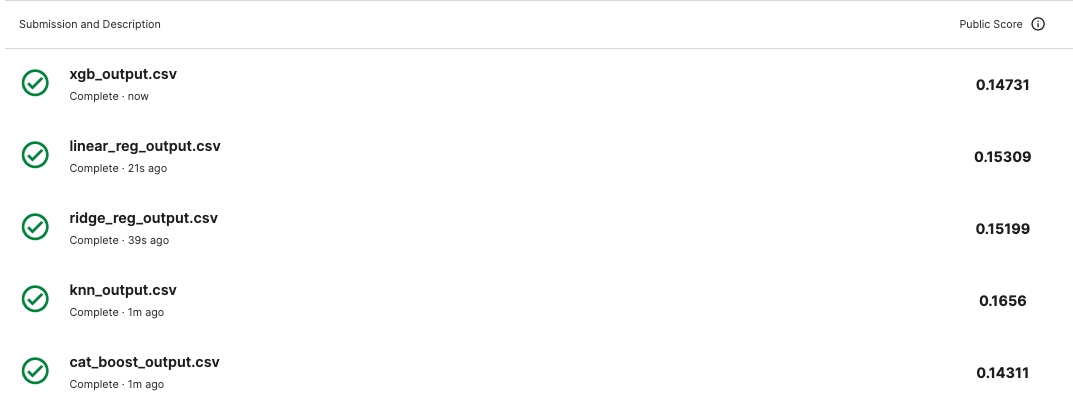

In [430]:
# @title
from IPython.display import Image
Image("/content/drive/My Drive/ColabNotebooks/house_sale_prediction/data/Screenshot 2023-10-30 at 10.04.48.png")

<a id = "deploying_model"></a>
## Deploying Model

# TODO: The next step is to deploy the model

<a id = "references"></a>
# References:
* https://www.kaggle.com/code/yaginun/crisp-dm-process-on-the-airbnb-dataset
* https://www.kaggle.com/code/sandhyakrishnan02/normal-distribution-skewness-and-kurtosis
* https://saturncloud.io/blog/how-to-transform-a-scipy-sparse-matrix-to-a-numpy-matrix/
* https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/
* https://sscc.wisc.edu/sscc/pubs/RegDiag-R/index.html
* https://datatab.net/tutorial/test-of-normality#:~:text=To%20test%20your%20data%20analytically,your%20data%20are%20normally%20distributed.
* https://www.youtube.com/watch?v=AVketBmpUTE

In [431]:
import os
os.path.exists("/content/drive/MyDrive/ColabNotebooks/house_sale_prediction/data/notebook.ipynb")
!!jupyter nbconvert "/content/drive/MyDrive/ColabNotebooks/house_sale_prediction/data/notebook.ipynb" --to pdf

['[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/house_sale_prediction/data/notebook.ipynb to pdf',
 "/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.",
 '  warn(',
 "/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.",
 '  warn(',
 "/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.",
 '  warn(',
 "/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.",
 '  warn(',
 "/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: